In [ ]:
pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
input_folder="/content/drive/MyDrive/dummy_sugarcane"
output="/content/final"
splitfolders.ratio(input_folder,output,seed=42,ratio=(.8,.1,.1))

Copying files: 1500 files [00:16, 92.55 files/s] 


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img_height,img_width=224,224
batch_size=32
train='/content/final/val'
valid='/content/final/train'
test='/content/final/test'

In [ ]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    input_folder,
    validation_split=0.2,
    subset='training',
    seed=123,
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 1500 files belonging to 4 classes.
Using 1200 files for training.


In [ ]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    input_folder,
    validation_split=0.2,
    subset='validation',
    seed=123,
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 1500 files belonging to 4 classes.
Using 300 files for validation.


In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
from keras.applications.densenet import DenseNet201
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense ,Dropout
from keras.layers import Input
     

base_model = DenseNet201(include_top=False,
                         input_shape=(224,224,3),
                         weights='imagenet',
                         pooling="avg"
                     )

74836368/74836368 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False 
image_input = Input(shape=(224, 224, 3))

x = base_model(image_input,training = False)

x = Dense(256,activation = "relu")(x)
x = Dropout(0.2)(x)

x = Dense(128,activation = "relu")(x)
x = Dropout(0.2)(x)

image_output = Dense(4,kernel_regularizer=l2(0.01),activation="softmax")(x) #output layer
#kernel Regulariser- SVM

model = Model(image_input,image_output)
model.compile(optimizer="adam",loss="squared_hinge",metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(base_model, to_file = 'Densenet.png', show_shapes = True, show_layer_names = True)

In [ ]:
epochs=5
history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
38/38 [==============================] - 252s 6s/step - loss: 1.2251 - accuracy: 0.5758 - val_loss: 1.0679 - val_accuracy: 0.7267
Epoch 2/5
38/38 [==============================] - 275s 7s/step - loss: 1.0833 - accuracy: 0.7167 - val_loss: 1.0166 - val_accuracy: 0.7833
Epoch 3/5
38/38 [==============================] - 276s 7s/step - loss: 1.0474 - accuracy: 0.7500 - val_loss: 0.9857 - val_accuracy: 0.8100
Epoch 4/5
38/38 [==============================] - 243s 6s/step - loss: 1.0049 - accuracy: 0.7900 - val_loss: 0.9707 - val_accuracy: 0.8300
Epoch 5/5
38/38 [==============================] - 246s 7s/step - loss: 1.0170 - accuracy: 0.7717 - val_loss: 0.9891 - val_accuracy: 0.7900


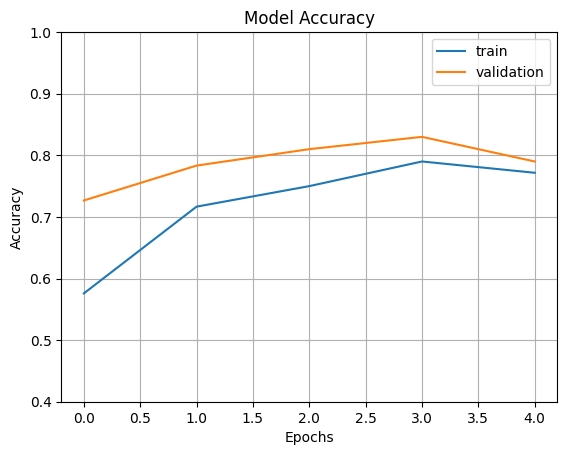

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()